<a href="https://colab.research.google.com/github/njaunick/Project-2-Group-4/blob/nick/obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
#!pip install ucimlrepo
#!pip install xgboost
#!pip install graphviz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
from ucimlrepo import fetch_ucirepo
from sklearn import datasets
from sklearn import tree
from sklearn.svm import SVC
import scipy.stats as st
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [155]:

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
#print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
#print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


In [156]:
df = pd.concat([X, y], axis=1)
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [157]:
df.shape

(2111, 17)

Dropping Null Values

In [158]:
# Dropping Null Values
df = df.dropna()
df.shape

(2111, 17)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [160]:
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [161]:
df.rename(columns={'NObeyesdad': 'Weight Classification', 'family_history_with_overweight': 'Family History'},inplace=True)
df.head()

Gender   Age  Height  Weight Family History FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

  Weight Classification  
0         Normal_Weight  
1         Normal_Weight  
2         Normal_Weight  
3    Overweight_Level_I  
4   Overweight_Level_II

In [162]:
y_copy = y.copy()
y_copy.rename(columns={'NObeyesdad': 'Weight Classification'},inplace=True)

<Axes: xlabel='Weight Classification'>

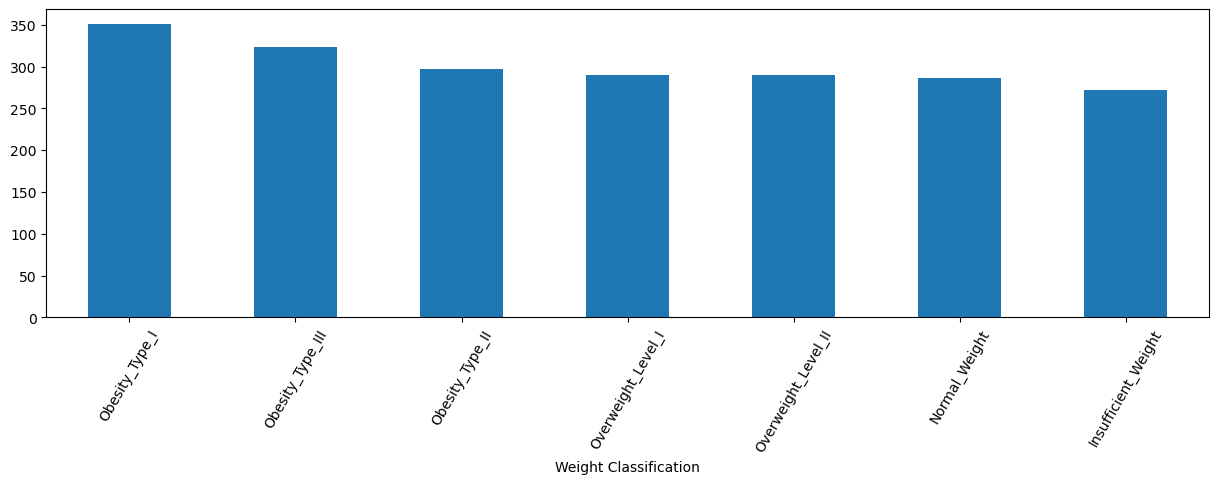

In [163]:
df['Weight Classification'].value_counts().plot(kind='bar', figsize=(15,4),rot=60)

In [164]:
y.value_counts()

NObeyesdad         
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [165]:
y.value_counts

<bound method DataFrame.value_counts of                NObeyesdad
0           Normal_Weight
1           Normal_Weight
2           Normal_Weight
3      Overweight_Level_I
4     Overweight_Level_II
...                   ...
2106     Obesity_Type_III
2107     Obesity_Type_III
2108     Obesity_Type_III
2109     Obesity_Type_III
2110     Obesity_Type_III

[2111 rows x 1 columns]>

In [166]:
df["Weight Classification"].value_counts()

Weight Classification
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

<Axes: xlabel='Weight', ylabel='Family History'>

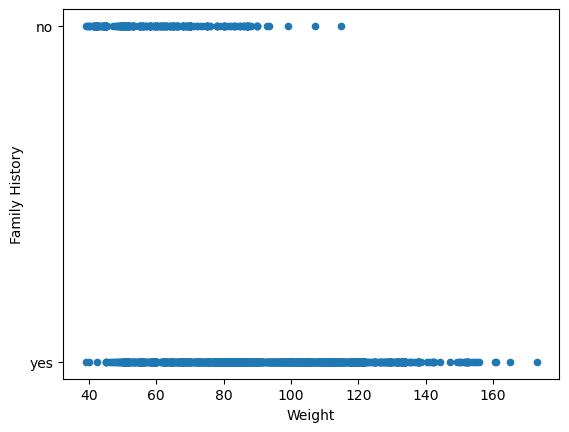

In [167]:
df.plot.scatter(x='Weight',
                  y='Family History')
                  #c=pd.factorize(df['Weight Classification'])[0], hue = 'blue')

<Axes: >

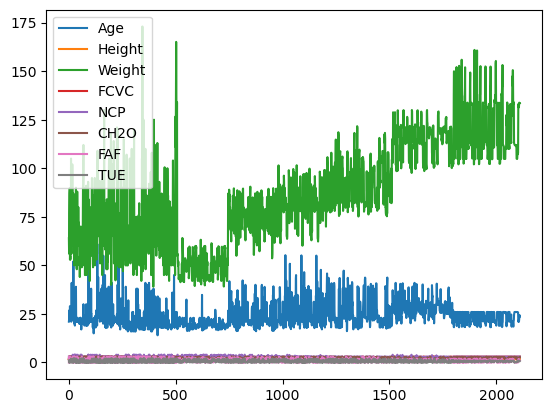

In [168]:
df.iloc[:].plot()

In [169]:
#dict_ = {'Logistic Regression': 68, 'Support Vector Machines (SVM)': 88, 'Random Forest': 95, 'KNN': 85,'Adaptive Boosting': 26.9, 'Decision Trees': 94.7,'Extra Trees': 94.5, 'Gradient Boosting': 94.3}
#pd.DataFrame([dict])
dict_={'Model':['Logistic Regression', 'Support Vector Machines (SVM)', 'Random Forest','KNN', 'Adaptive Boosting', 'Decision Trees', 'Extra Trees', 'Gradient Boosting'],
               'Model Accuracy': [68,88,95,85,26.9,94.7,94.5,94.3]}
#dict_
df_accuracy = pd.DataFrame.from_dict(dict_)
df_accuracy


Model  Model Accuracy
0            Logistic Regression            68.0
1  Support Vector Machines (SVM)            88.0
2                  Random Forest            95.0
3                            KNN            85.0
4              Adaptive Boosting            26.9
5                 Decision Trees            94.7
6                    Extra Trees            94.5
7              Gradient Boosting            94.3

<Axes: xlabel='Model'>

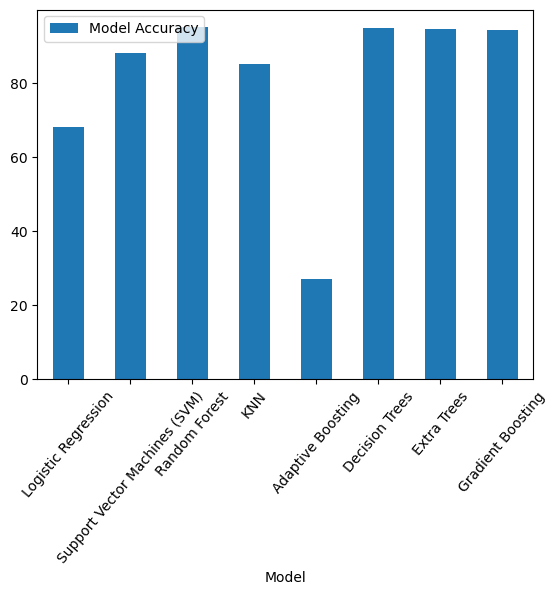

In [170]:
df_accuracy.plot(x = "Model", y = "Model Accuracy", kind= 'bar', rot = 50)

<Axes: title={'center': 'Model Accuracy by Model'}, xlabel='Model', ylabel='Accuracy Percentage'>

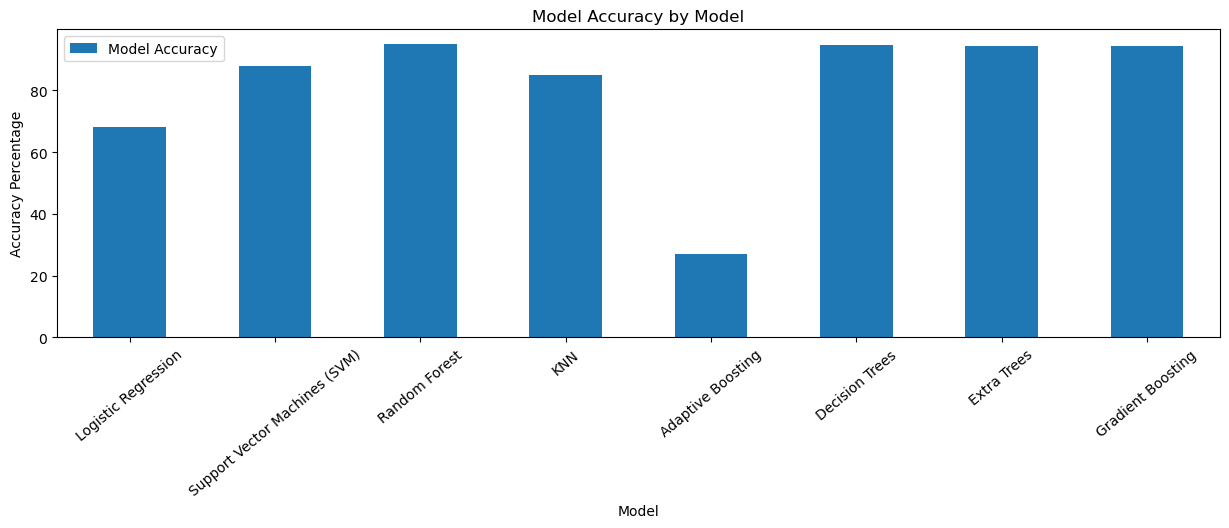

In [171]:
df_accuracy.plot.bar(x = "Model", y = "Model Accuracy", title="Model Accuracy by Model",ylabel="Accuracy Percentage",figsize=(15,4),rot = 40)

<Axes: >

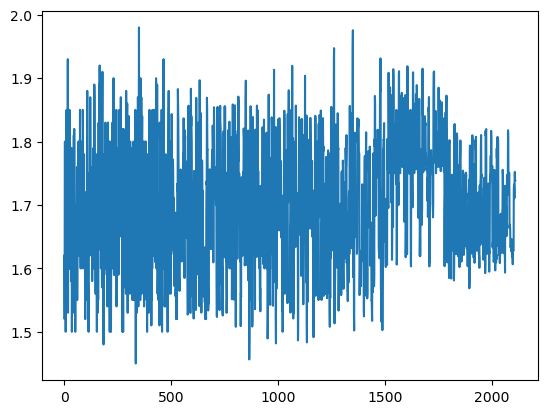

In [172]:
df["Height"].iloc[:].plot()

In [173]:
df_sort_2 = df.copy()
df_sort_2

Gender        Age    Height      Weight Family History FAVC  FCVC  NCP  \
0     Female  21.000000  1.620000   64.000000            yes   no   2.0  3.0   
1     Female  21.000000  1.520000   56.000000            yes   no   3.0  3.0   
2       Male  23.000000  1.800000   77.000000            yes   no   2.0  3.0   
3       Male  27.000000  1.800000   87.000000             no   no   3.0  3.0   
4       Male  22.000000  1.780000   89.800000             no   no   2.0  1.0   
...      ...        ...       ...         ...            ...  ...   ...  ...   
2106  Female  20.976842  1.710730  131.408528            yes  yes   3.0  3.0   
2107  Female  21.982942  1.748584  133.742943            yes  yes   3.0  3.0   
2108  Female  22.524036  1.752206  133.689352            yes  yes   3.0  3.0   
2109  Female  24.361936  1.739450  133.346641            yes  yes   3.0  3.0   
2110  Female  23.664709  1.738836  133.472641            yes  yes   3.0  3.0   

           CAEC SMOKE      CH2O  SCC       FAF       TUE        CALC  \
0     Sometimes    no  2.000000   no  0.000000  1.000000          no   
1     Sometimes   yes  3.000000  yes  3.000000  0.000000   Sometimes   
2     Sometimes    no  2.000000   no  2.000000  1.000000  Frequently   
3     Sometimes    no  2.000000   no  2.000000  0.000000  Frequently   
4     Sometimes    no  2.000000   no  0.000000  0.000000   Sometimes   
...         ...   ...       ...  ...       ...       ...         ...   
2106  Sometimes    no  1.728139   no  1.676269  0.906247   Sometimes   
2107  Sometimes    no  2.005130   no  1.341390  0.599270   Sometimes   
2108  Sometimes    no  2.054193   no  1.414209  0.646288   Sometimes   
2109  Sometimes    no  2.852339   no  1.139107  0.586035   Sometimes   
2110  Sometimes    no  2.863513   no  1.026452  0.714137   Sometimes   

                     MTRANS Weight Classification  
0     Public_Transportation         Normal_Weight  
1     Public_Transportation         Normal_Weight  
2     Public_Transportation         Normal_Weight  
3                   Walking    Overweight_Level_I  
4     Public_Transportation   Overweight_Level_II  
...                     ...                   ...  
2106  Public_Transportation      Obesity_Type_III  
2107  Public_Transportation      Obesity_Type_III  
2108  Public_Transportation      Obesity_Type_III  
2109  Public_Transportation      Obesity_Type_III  
2110  Public_Transportation      Obesity_Type_III  

[2111 rows x 17 columns]

In [174]:
df_sort_2.sort_values('Height')

Gender        Age    Height      Weight Family History FAVC  FCVC  \
334   Female  18.000000  1.450000   53.000000             no  yes   2.0   
865   Female  18.000000  1.456346   55.523481             no  yes   2.0   
183   Female  23.000000  1.480000   60.000000            yes  yes   2.0   
990   Female  22.154854  1.481682   61.373868            yes   no   2.0   
1135  Female  21.959940  1.483284   62.894283            yes   no   2.0   
...      ...        ...       ...         ...            ...  ...   ...   
1479    Male  21.962219  1.931263  118.203130            yes  yes   2.0   
1349    Male  19.524698  1.942725  121.657979            yes  yes   2.0   
1262    Male  22.277859  1.947406  116.893105            yes  yes   2.0   
1350    Male  20.491475  1.975663  120.702935            yes  yes   2.0   
349     Male  20.000000  1.980000  125.000000            yes  yes   2.0   

           NCP        CAEC SMOKE      CH2O  SCC       FAF       TUE  \
334   3.000000  Frequently    no  2.000000  yes  1.000000  2.000000   
865   3.000000   Sometimes    no  1.040342  yes  0.497373  1.783319   
183   1.000000   Sometimes   yes  1.000000   no  0.000000  0.000000   
990   2.983297   Sometimes    no  1.453626   no  0.328960  0.509396   
1135  1.680838   Sometimes    no  1.833635   no  0.281876  0.575848   
...        ...         ...   ...       ...  ...       ...       ...   
1479  3.000000   Sometimes    no  3.000000   no  0.743593  1.000000   
1349  3.000000   Sometimes    no  3.000000   no  1.000000  1.014808   
1262  3.000000   Sometimes    no  3.000000   no  0.975187  1.000000   
1350  3.000000   Sometimes    no  3.000000   no  0.767013  1.000000   
349   3.000000      Always    no  3.000000   no  1.000000  1.000000   

            CALC                 MTRANS Weight Classification  
334   Frequently  Public_Transportation    Overweight_Level_I  
865    Sometimes  Public_Transportation    Overweight_Level_I  
183    Sometimes  Public_Transportation   Overweight_Level_II  
990           no  Public_Transportation   Overweight_Level_II  
1135          no  Public_Transportation   Overweight_Level_II  
...          ...                    ...                   ...  
1479   Sometimes  Public_Transportation        Obesity_Type_I  
1349   Sometimes  Public_Transportation        Obesity_Type_I  
1262   Sometimes  Public_Transportation        Obesity_Type_I  
1350   Sometimes  Public_Transportation        Obesity_Type_I  
349    Sometimes  Public_Transportation        Obesity_Type_I  

[2111 rows x 17 columns]

In [175]:
str_to_int = {
        'Male': 1,
        'Female': 0,
        'yes': 1,
        'no': 0,
        'Sometimes': 1,
        'Frequently': 2,
        'Always': 3,
        'Insufficient_Weight': 0,
        'Normal_Weight': 1,
        'Overweight_Level_I': 2,
        'Overweight_Level_II': 3,
        'Obesity_Type_I': 4,
        'Obesity_Type_II': 5,
        'Obesity_Type_III': 6,
        'Public_Transportation': 0,
        'Automobile': 1,
        'Motorbike': 2,
        'Bike': 3,
        'Walking': 4,
    }
     # Apply mapping to all relevant columns
df[df.columns] = df[df.columns].replace(str_to_int, regex=False)
df.head(20)
df.head()

Gender   Age  Height  Weight  Family History  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       0  21.0    1.62    64.0               1     0   2.0  3.0     1      0   
1       0  21.0    1.52    56.0               1     0   3.0  3.0     1      1   
2       1  23.0    1.80    77.0               1     0   2.0  3.0     1      0   
3       1  27.0    1.80    87.0               0     0   3.0  3.0     1      0   
4       1  22.0    1.78    89.8               0     0   2.0  1.0     1      0   

   CH2O  SCC  FAF  TUE  CALC  MTRANS  Weight Classification  
0   2.0    0  0.0  1.0     0       0                      1  
1   3.0    1  3.0  0.0     1       0                      1  
2   2.0    0  2.0  1.0     2       0                      1  
3   2.0    0  2.0  0.0     2       4                      2  
4   2.0    0  0.0  0.0     1       0                      3

<Axes: >

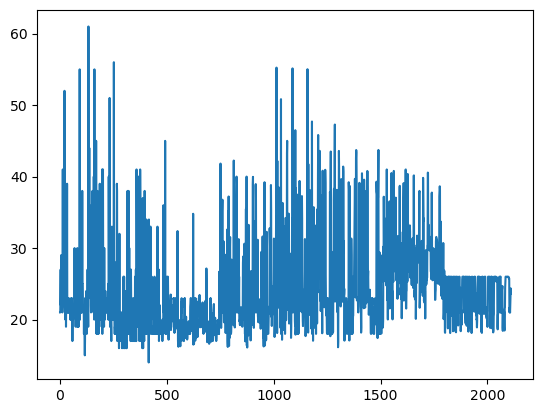

In [176]:
df["Age"].iloc[:].plot()

<Axes: >

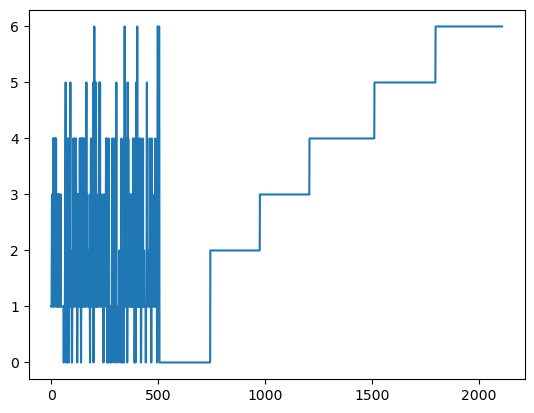

In [177]:
df['Weight Classification'].iloc[:].plot()

<Axes: >

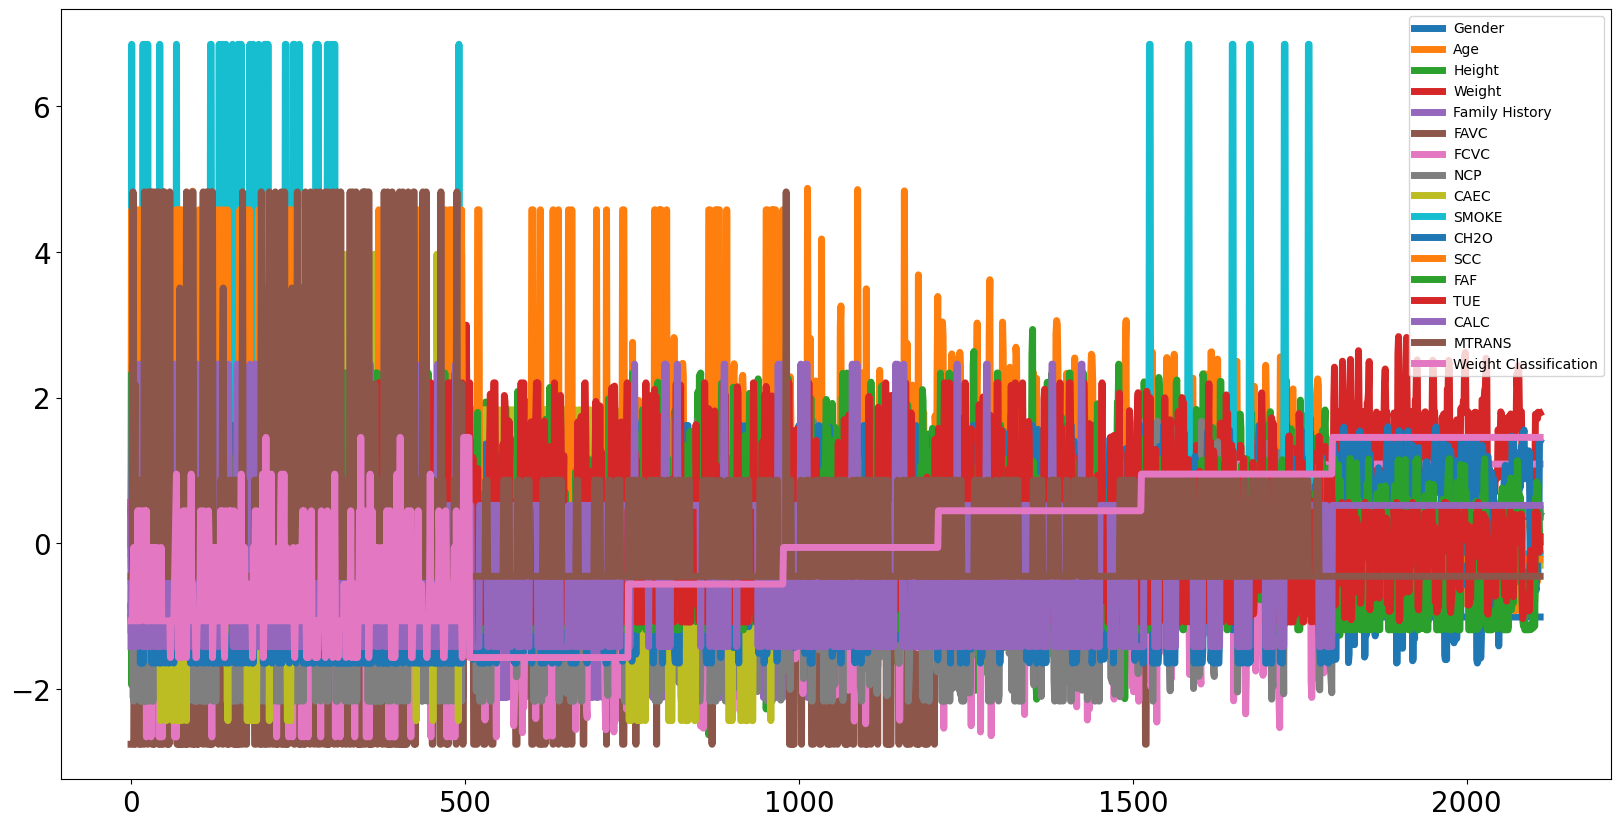

In [178]:
#trying to scale all the data into one graph. did NOT work. very ugly
scaler = StandardScaler()

df1 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df1.plot(figsize=(20,10), linewidth=5, fontsize = 20)
#df1.plot.scatter(figsize=(20,10), linewidth=5, fontsize = 20)

<Axes: xlabel='Height', ylabel='Weight'>

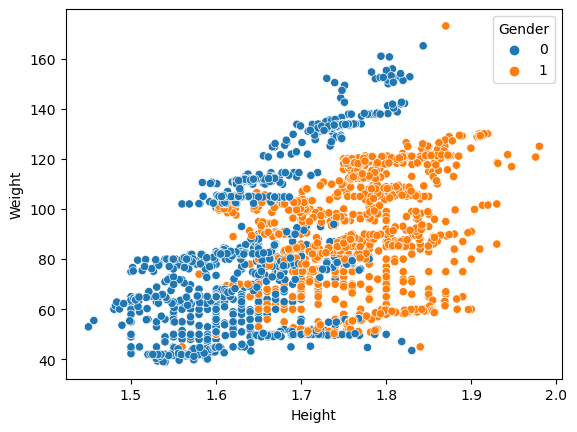

In [180]:
sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender')

<Axes: xlabel='Height', ylabel='Weight'>

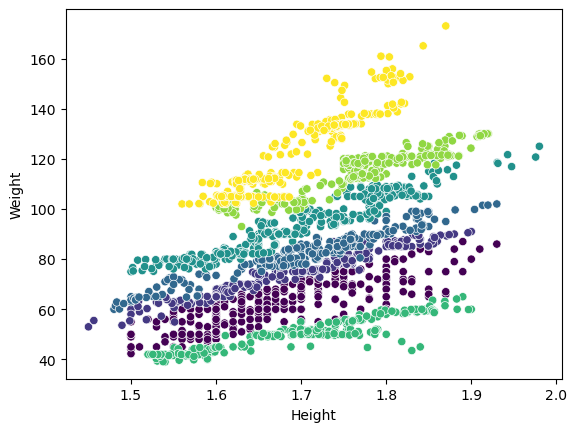

In [181]:
sns.scatterplot(data=df, x='Height', y='Weight',  c =pd.factorize(df["Weight Classification"])[0])

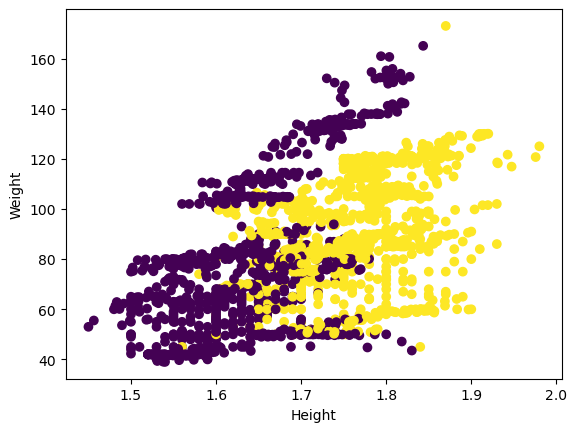

In [183]:
plt.scatter(df.iloc[:,2],df.iloc[:,3],c =pd.factorize(df["Gender"])[0])

plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

<Axes: xlabel='Height', ylabel='Weight'>

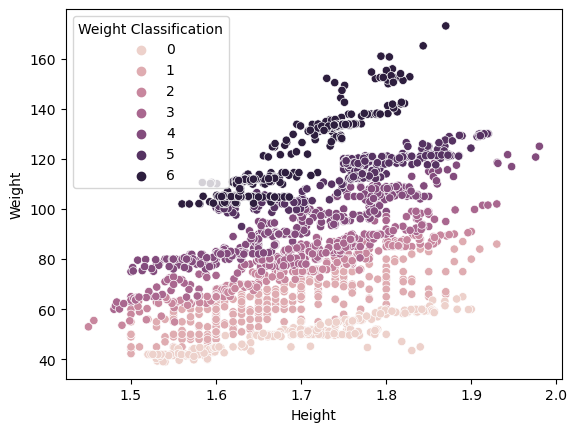

In [184]:
sns.scatterplot(data=df, x='Height', y='Weight', hue='Weight Classification')

<Axes: xlabel='Height', ylabel='Weight'>

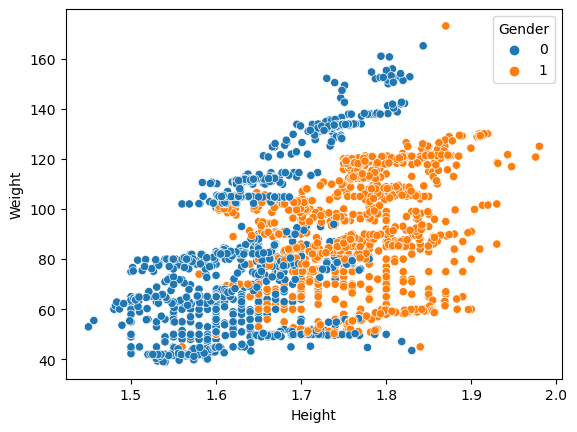

In [185]:
sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender')

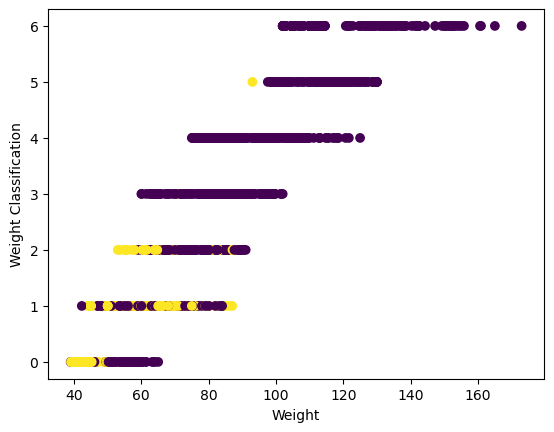

In [186]:
#scatterplot family history and weight
plt.scatter(df.iloc[:,3],df.iloc[:,16],c =pd.factorize(df["Family History"])[0])
#plt.scatter(df.iloc[:,2],df.iloc[:,3],c =pd.factorize(df["Gender"])[0])

plt.xlabel('Weight')
plt.ylabel('Weight Classification')
#plt.legend(pd.factorize(df["NObeyesdad"])[0])
plt.show()

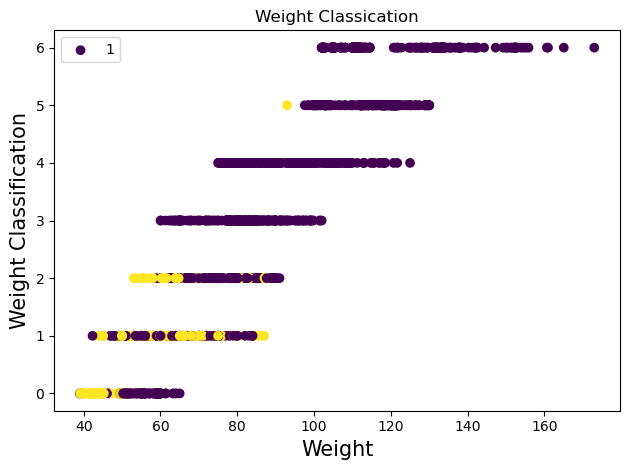

In [187]:
fig, ax = plt.subplots()
ax.scatter(df.iloc[:,3],df.iloc[:,16],c =pd.factorize(df["Family History"])[0])

ax.set_xlabel(r'Weight', fontsize=15)
ax.set_ylabel(r'Weight Classification', fontsize=15)
ax.set_title('Weight Classication')
ax.legend(df.iloc[:,16], loc='upper left')
#ax.grid(True)
fig.tight_layout()

plt.show()
#fig.savefig('performance.png', dpi=100)

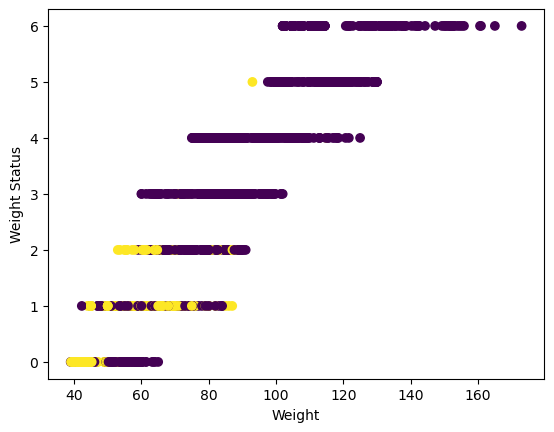

In [188]:
#scatterplot family history and weight
plt.scatter(df.iloc[:,3],df.iloc[:,16],c =pd.factorize(df["Family History"])[0])
#plt.scatter(df.iloc[:,2],df.iloc[:,3],c =pd.factorize(df["Gender"])[0])

plt.xlabel('Weight')
plt.ylabel('Weight Status')
#plt.legend(pd.factorize(df["NObeyesdad"])[0])
plt.show()

<Axes: >

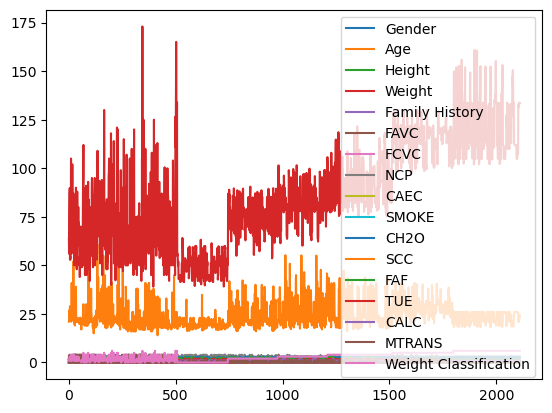

In [190]:
#non-scalled all features. very messy. did not use
df.loc[:].plot()

In [191]:
X_lin = df.drop('Weight Classification', axis=1)
y_lin = df['Weight Classification'].values.reshape(-1, 1)

In [192]:
# Now split the data into training and testing sets
#X_full_train, X_full_test, X_sel_train, X_sel_test, y_train, y_test = train_test_split(X_full, X_sel, y, random_state=42)
X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, random_state=42)

In [193]:
lr1 = LinearRegression()
# Fit the first model to the full training data. 
lr1.fit(X_lin_train, y_lin_train)

LinearRegression()

In [194]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

# Use our models to make predictions
predicted1 = lr1.predict(X_lin_test)

# Score the predictions with mse and r2
mse1 = mean_squared_error(y_lin_test, predicted1)
r21 = r2_score(y_lin_test, predicted1)


print(f"All Features:")
print(f"mean squared error (MSE): {mse1}")
print(f"R-squared (R2): {r21}")

All Features:
mean squared error (MSE): 0.1945451424765774
R-squared (R2): 0.9509752571633462


In [195]:
# Provided code to create the adjusted r-squared function
def r2_adj(x, y, model):
    r2 = model.score(x,y)
    n_cols = x.shape[1]
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - n_cols - 1)

In [196]:
# Calculate the adjusted r-squared value of the model
adj_score1 = r2_adj(X_lin_test, y_lin_test, lr1)
print(f"All Features Adjusted R2: {adj_score1}")


All Features Adjusted R2: 0.9494402358612201


In [197]:
# Examine linear regression on the better training data using cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(LinearRegression(), X_lin_train, y_lin_train, scoring = "r2")
print(f"All scores: {cv_scores}")
print(f"Mean score: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")

All scores: [0.94898003 0.95596483 0.94543365 0.95280277 0.94188108]
Mean score: 0.9490124740565484
Standard Deviation: 0.0050272731775233385


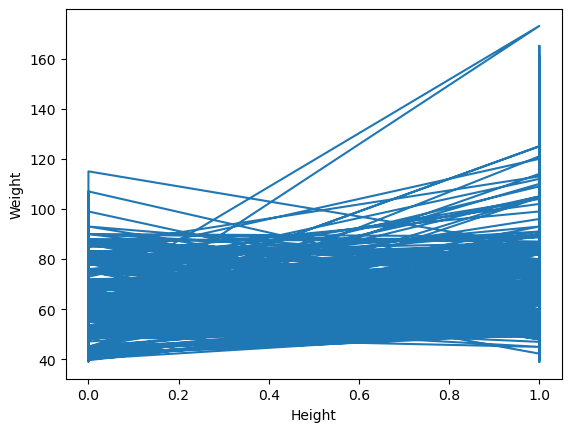

In [201]:
plt.plot(df.iloc[:,4],df.iloc[:,3])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

<Axes: xlabel='Height', ylabel='Weight'>

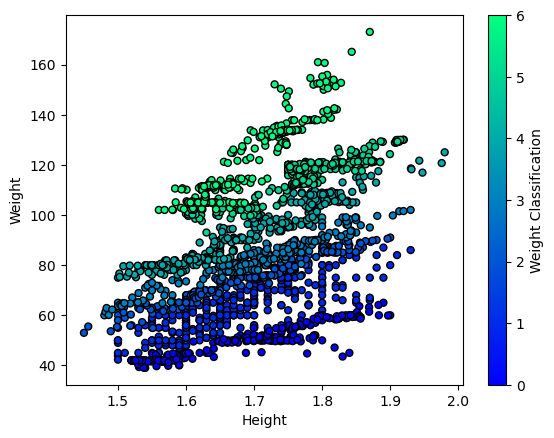

In [202]:
# Plot the data on a scatter plot
df.plot.scatter(
    x='Height', 
    y='Weight', 
    c='Weight Classification', 
    marker='o', 
    s=25, 
    edgecolor='k',
    colormap="winter"
)

In [203]:
df_corr["Weight Classification"].sort_values()

CAEC                    -0.329350
FAF                     -0.199901
SCC                     -0.194508
MTRANS                  -0.146275
TUE                     -0.107991
Gender                  -0.031464
SMOKE                    0.003442
NCP                      0.026690
CH2O                     0.133008
Height                   0.133565
CALC                     0.151752
FCVC                     0.227759
FAVC                     0.247793
Age                      0.282913
Family History           0.505148
Weight                   0.913251
Weight Classification    1.000000
Name: Weight Classification, dtype: float64

<Axes: xlabel='Weight', ylabel='Family History'>

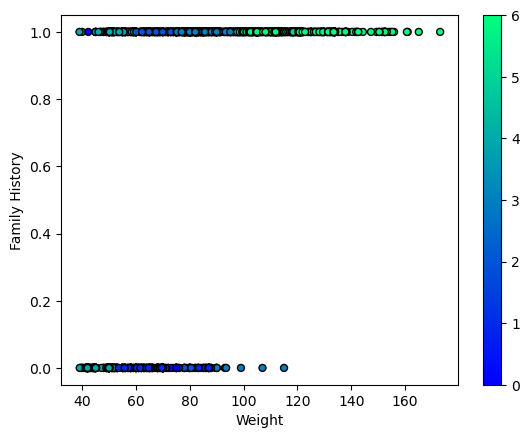

In [204]:
# Plot the data on a scatter plot
df.plot.scatter(
    x='Weight', 
    y='Family History', 
    c=pd.factorize(df["Weight Classification"])[0], 
    marker='o', 
    s=25, 
    edgecolor='k',
    colormap="winter"
)

In [205]:
correlation = st.pearsonr(df.iloc[:,4],df.iloc[:,3])
correlation

PearsonRResult(statistic=0.49682037673397417, pvalue=5.326128756884991e-132)

In [206]:
#Correlation of highest

df_corr = df.corr()
df_corr.unstack().sort_values()
#df_corr
df_corr["Weight Classification"].sort_values()

CAEC                    -0.329350
FAF                     -0.199901
SCC                     -0.194508
MTRANS                  -0.146275
TUE                     -0.107991
Gender                  -0.031464
SMOKE                    0.003442
NCP                      0.026690
CH2O                     0.133008
Height                   0.133565
CALC                     0.151752
FCVC                     0.227759
FAVC                     0.247793
Age                      0.282913
Family History           0.505148
Weight                   0.913251
Weight Classification    1.000000
Name: Weight Classification, dtype: float64

<Axes: >

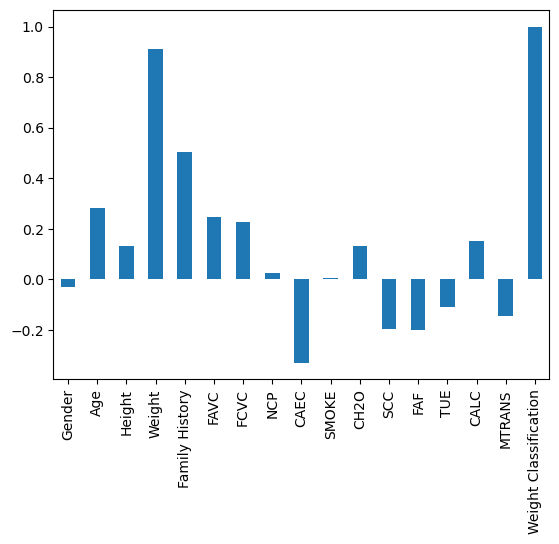

In [207]:
#correlation bar chart
df_corr["Weight Classification"].plot.bar()

In [208]:
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.5


In [209]:
correlation = st.pearsonr(df.iloc[:,3],df.iloc[:,16])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.91


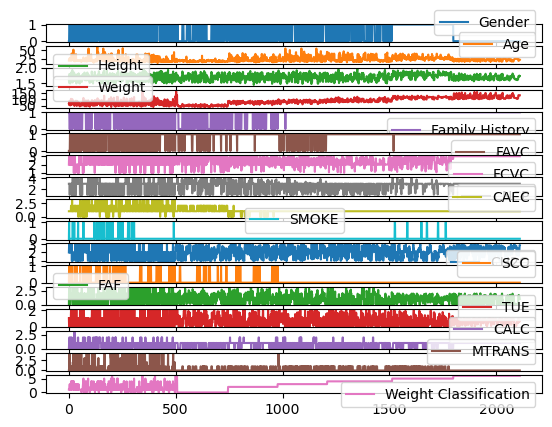

In [210]:
df.plot(subplots=True)

#plt.tight_layout()
plt.show()

In [211]:
df_sort_1 = df["Age"].copy()
df_sort_1
#df_copy["Age"].unique().sort()
#df["Age"]

0       21.000000
1       21.000000
2       23.000000
3       27.000000
4       22.000000
          ...    
2106    20.976842
2107    21.982942
2108    22.524036
2109    24.361936
2110    23.664709
Name: Age, Length: 2111, dtype: float64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2111 non-null   int64  
 1   Age                    2111 non-null   float64
 2   Height                 2111 non-null   float64
 3   Weight                 2111 non-null   float64
 4   Family History         2111 non-null   int64  
 5   FAVC                   2111 non-null   int64  
 6   FCVC                   2111 non-null   float64
 7   NCP                    2111 non-null   float64
 8   CAEC                   2111 non-null   int64  
 9   SMOKE                  2111 non-null   int64  
 10  CH2O                   2111 non-null   float64
 11  SCC                    2111 non-null   int64  
 12  FAF                    2111 non-null   float64
 13  TUE                    2111 non-null   float64
 14  CALC                   2111 non-null   int64  
 15  MTRA

In [213]:
# Split into features and target
X = df.drop('Weight Classification', axis=1)
y = df['Weight Classification']

In [214]:
y.value_counts()

Weight Classification
4    351
6    324
5    297
2    290
3    290
1    287
0    272
Name: count, dtype: int64

<Axes: xlabel='Weight Classification'>

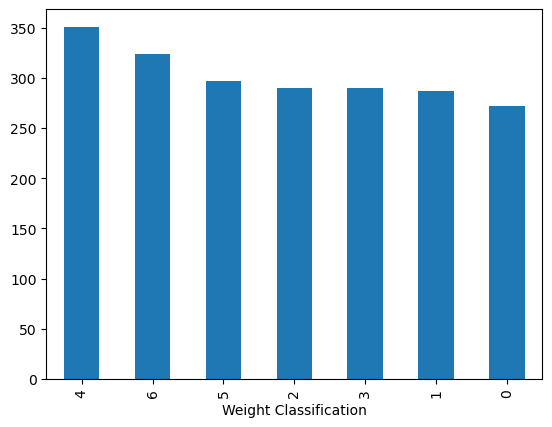

In [216]:
y.value_counts().plot(kind='bar')

In [217]:
# Split into train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
print("NaN values in target variable:", df['Weight Classification'].isna().sum())

NaN values in target variable: 0


Logistic Regression

In [219]:
# Logistic Regression Model
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [220]:
accuracy = lr.score(X_test, y_test)
print("\nModel Accuracy:", accuracy)
print("\nModel Accuracy Train:", lr.score(X_train, y_train))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.8392434988179669

Model Accuracy Train: 0.8530805687203792

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        56
           1       0.80      0.58      0.67        62
           2       0.67      0.71      0.69        56
           3       0.70      0.70      0.70        50
           4       0.92      0.90      0.91        78
           5       0.91      1.00      0.95        58
           6       1.00      1.00      1.00        63

    accuracy                           0.84       423
   macro avg       0.83      0.83      0.83       423
weighted avg       0.84      0.84      0.84       423


Confusion Matrix:
[[53  3  0  0  0  0  0]
 [12 36 11  3  0  0  0]
 [ 0  5 40 11  0  0  0]
 [ 0  1  7 35  6  1  0]
 [ 0  0  2  1 70  5  0]
 [ 0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0 63]]


In [221]:
# Calculate feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lr.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Best model predictions
best_predictions = lr.predict(X_test)
print("\nBest Model Predictions (first 10):")
print(best_predictions[:10])


Feature Importance:
           Feature  Importance
2           Height    4.363423
0           Gender    3.840749
12             FAF    1.144129
8             CAEC    1.132683
5             FAVC    1.004950
7              NCP    0.876793
11             SCC    0.855971
3           Weight    0.854774
15          MTRANS    0.756613
10            CH2O    0.750593
6             FCVC    0.472569
9            SMOKE    0.329904
1              Age    0.224616
13             TUE    0.208078
4   Family History    0.122044
14            CALC    0.098673

Best Model Predictions (first 10):
[0 6 0 0 1 0 5 2 4 0]


In [222]:
#accuracy = lr.score(X_test, y_test)
print("\nModel Accuracy:", lr.score(X_test, y_test))
print("\nModel Accuracy Train:", lr.score(X_train, y_train))


Model Accuracy: 0.8392434988179669

Model Accuracy Train: 0.8530805687203792


In [223]:
from sklearn.inspection import permutation_importance
model_fi = permutation_importance(lr, X, y)
model_fi['importances_mean']      

array([0.19924207, 0.07399337, 0.03107532, 0.61231644, 0.01411653,
       0.02832781, 0.03477025, 0.0215064 , 0.02046423, 0.00198958,
       0.0267172 , 0.00672667, 0.0301279 , 0.01961156, 0.02520133,
       0.01440076])

In [224]:
#feat_import.plot(x= "Feature", y="Importance", kind = "bar",rot=60)
#plt.show()

KNN model

k: 1, Train/Test Score: 1.000/0.894
k: 3, Train/Test Score: 0.940/0.891
k: 5, Train/Test Score: 0.914/0.879
k: 7, Train/Test Score: 0.892/0.858
k: 9, Train/Test Score: 0.871/0.851
k: 11, Train/Test Score: 0.852/0.825
k: 13, Train/Test Score: 0.839/0.809
k: 15, Train/Test Score: 0.822/0.801
k: 17, Train/Test Score: 0.814/0.794
k: 19, Train/Test Score: 0.812/0.792


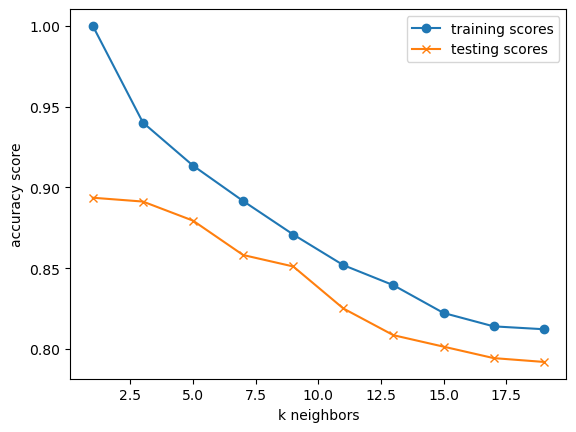

In [225]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [226]:
# Choose the best k, and refit the KNN classifier by using that k value.
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# Print the score for the test data.
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))
# Print the score for the train data
print('k=9 Train Acc: %.3f' % knn.score(X_train, y_train))

k=9 Test Acc: 0.851
k=9 Train Acc: 0.871


Gradient Boosting Model

In [227]:
# Training the Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [228]:
# Evaluate the model
print("Test Accuracy:", gb.score(X_test, y_test))
print("Train Accuracy:", gb.score(X_train, y_train))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, gb.predict(X_test)))
print("ROC AUC Score:", roc_auc_score(y_test, gb.predict_proba(X_test), multi_class='ovr'))

Test Accuracy: 0.9432624113475178
Train Accuracy: 0.9970379146919431
Balanced Accuracy: 0.9424251785081278
ROC AUC Score: 0.9956303000605571


In [229]:
gb

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

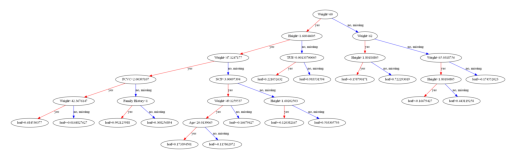

In [230]:
model = XGBClassifier()
model.fit(X, y)
# plot single tree
plot_tree(model)
plt.show()

Adaptive Boosting Classifier

In [233]:
# Training the Adaptive Boosting Classifier
abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train)
#plot_tree(abc)
#plt.show()

AdaBoostClassifier(random_state=42)

In [234]:
# Evaluate the model
print("Test Accuracy:", abc.score(X_test, y_test))
print("Train Accuracy:", abc.score(X_train, y_train))

Test Accuracy: 0.2695035460992908
Train Accuracy: 0.283175355450237


Decision Tree Classifier

In [235]:
# Train a Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [236]:
# Evaluate the model
print("Test Accuracy:", dtc.score(X_test, y_test))
print("Train Accuracy:", dtc.score(X_train, y_train))

Test Accuracy: 0.9456264775413712
Train Accuracy: 1.0


[Text(0.638864871541502, 0.9583333333333334, 'x[3] <= 99.568\ngini = 0.856\nsamples = 1688\nvalue = [216, 225, 234, 240, 273, 239, 261]'),
 Text(0.36863883399209485, 0.875, 'x[3] <= 60.059\ngini = 0.801\nsamples = 1108\nvalue = [216, 225, 234, 236, 192, 5, 0]'),
 Text(0.16057312252964426, 0.7916666666666666, 'x[2] <= 1.66\ngini = 0.479\nsamples = 333\nvalue = [212, 113, 7, 1, 0, 0, 0]'),
 Text(0.058300395256917, 0.7083333333333334, 'x[3] <= 46.828\ngini = 0.531\nsamples = 177\nvalue = [71, 98, 7, 1, 0, 0, 0]'),
 Text(0.015810276679841896, 0.625, 'x[3] <= 44.959\ngini = 0.131\nsamples = 71\nvalue = [66, 5, 0, 0, 0, 0, 0]'),
 Text(0.007905138339920948, 0.5416666666666666, 'gini = 0.0\nsamples = 57\nvalue = [57, 0, 0, 0, 0, 0, 0]'),
 Text(0.023715415019762844, 0.5416666666666666, 'x[2] <= 1.58\ngini = 0.459\nsamples = 14\nvalue = [9, 5, 0, 0, 0, 0, 0]'),
 Text(0.015810276679841896, 0.4583333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0, 0, 0, 0, 0]'),
 Text(0.03162055335968379, 0.

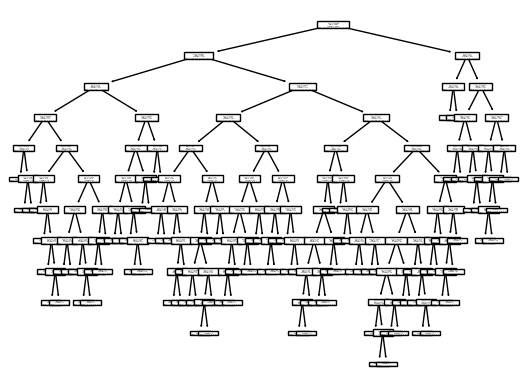

In [237]:
tree.plot_tree(dtc)

In [244]:
#plt.figure(tree.plot_tree(dtc))
#plt.show()
df_corr

Gender       Age    Height    Weight  Family History  \
Gender                 1.000000  0.048394  0.618466  0.161668        0.102512   
Age                    0.048394  1.000000 -0.025958  0.202560        0.205725   
Height                 0.618466 -0.025958  1.000000  0.463136        0.247684   
Weight                 0.161668  0.202560  0.463136  1.000000        0.496820   
Family History         0.102512  0.205725  0.247684  0.496820        1.000000   
FAVC                   0.064934  0.063902  0.178364  0.272300        0.208036   
FCVC                  -0.274505  0.016291 -0.038121  0.216125        0.040372   
NCP                    0.067600 -0.043944  0.243672  0.107469        0.071370   
CAEC                  -0.091543 -0.083739 -0.048818 -0.287493       -0.169787   
SMOKE                  0.044698  0.091987  0.055499  0.025746        0.017385   
CH2O                   0.107930 -0.045304  0.213376  0.200575        0.147437   
SCC                   -0.102633 -0.116283 -0.133753 -0.201906       -0.185422   
FAF                    0.189607 -0.144938  0.294709 -0.051436       -0.056673   
TUE                    0.017269 -0.296931  0.051912 -0.071561        0.022943   
CALC                  -0.007616  0.044487  0.129732  0.206677       -0.036676   
MTRANS                 0.129704  0.279891  0.078282 -0.104970       -0.016124   
Weight Classification -0.031464  0.282913  0.133565  0.913251        0.505148   

                           FAVC      FCVC       NCP      CAEC     SMOKE  \
Gender                 0.064934 -0.274505  0.067600 -0.091543  0.044698   
Age                    0.063902  0.016291 -0.043944 -0.083739  0.091987   
Height                 0.178364 -0.038121  0.243672 -0.048818  0.055499   
Weight                 0.272300  0.216125  0.107469 -0.287493  0.025746   
Family History         0.208036  0.040372  0.071370 -0.169787  0.017385   
FAVC                   1.000000 -0.027283 -0.007000 -0.150068 -0.050660   
FCVC                  -0.027283  1.000000  0.042216  0.054670  0.014320   
NCP                   -0.007000  0.042216  1.000000  0.097801  0.007811   
CAEC                  -0.150068  0.054670  0.097801  1.000000  0.055282   
SMOKE                 -0.050660  0.014320  0.007811  0.055282  1.000000   
CH2O                   0.009719  0.068461  0.057088 -0.144995 -0.031995   
SCC                   -0.190658  0.071852 -0.015624  0.109179  0.047731   
FAF                   -0.107995  0.019939  0.129504  0.030110  0.011216   
TUE                    0.068417 -0.101135  0.036326  0.048567  0.017613   
CALC                   0.089520  0.060781  0.071747 -0.047540  0.082471   
MTRANS                -0.146358 -0.029537  0.040601  0.064256  0.025864   
Weight Classification  0.247793  0.227759  0.026690 -0.329350  0.003442   

                           CH2O       SCC       FAF       TUE      CALC  \
Gender                 0.107930 -0.102633  0.189607  0.017269 -0.007616   
Age                   -0.045304 -0.116283 -0.144938 -0.296931  0.044487   
Height                 0.213376 -0.133753  0.294709  0.051912  0.129732   
Weight                 0.200575 -0.201906 -0.051436 -0.071561  0.206677   
Family History         0.147437 -0.185422 -0.056673  0.022943 -0.036676   
FAVC                   0.009719 -0.190658 -0.107995  0.068417  0.089520   
FCVC                   0.068461  0.071852  0.019939 -0.101135  0.060781   
NCP                    0.057088 -0.015624  0.129504  0.036326  0.071747   
CAEC                  -0.144995  0.109179  0.030110  0.048567 -0.047540   
SMOKE                 -0.031995  0.047731  0.011216  0.017613  0.082471   
CH2O                   1.000000  0.008036  0.167236  0.011965  0.091386   
SCC                    0.008036  1.000000  0.074221 -0.010928  0.003463   
FAF                    0.167236  0.074221  1.000000  0.058562 -0.086799   
TUE                    0.011965 -0.010928  0.058562  1.000000 -0.045864   
CALC                   0.091386  0.003463 -0.086799 -0.045864  1.000000   
MTRANS         

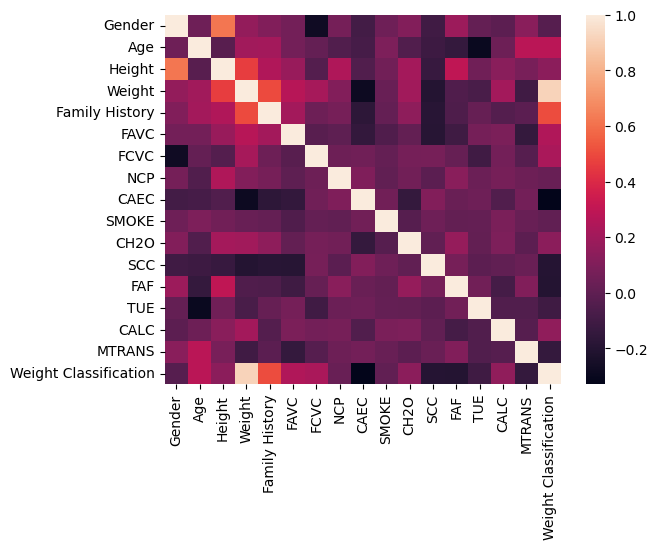

In [245]:
corr = df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)
plt.show()

In [246]:
#df_corr.df.sort_values(by=['Weight Classication'], ascending=False)
df_corr["Weight Classification"]

Gender                  -0.031464
Age                      0.282913
Height                   0.133565
Weight                   0.913251
Family History           0.505148
FAVC                     0.247793
FCVC                     0.227759
NCP                      0.026690
CAEC                    -0.329350
SMOKE                    0.003442
CH2O                     0.133008
SCC                     -0.194508
FAF                     -0.199901
TUE                     -0.107991
CALC                     0.151752
MTRANS                  -0.146275
Weight Classification    1.000000
Name: Weight Classification, dtype: float64

In [247]:
#df_corr.sort_values(by=list(df_corr["Weight Classification"]),axis=0)

In [248]:
df_corr_df = df.corr()
#df_corr_df["NObeyesdad"].sort
sorted(df_corr_df["Weight Classification"], reverse=True)

[1.0,
 0.9132508017656477,
 0.5051484175624694,
 0.28291340993640474,
 0.24779320005028285,
 0.22775882699217714,
 0.15175232229902483,
 0.13356455844101742,
 0.13300843581117708,
 0.026690439174361102,
 0.0034421790751229435,
 -0.031463618020719036,
 -0.1079914949843175,
 -0.14627531389427884,
 -0.19450765594046912,
 -0.19990083535467992,
 -0.32934971630039606]

Random Forest Classifier

In [249]:
# Train a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [250]:
# Evaluate the model
print("Test Accuracy:", rfc.score(X_test, y_test))
print("Train Accuracy:", rfc.score(X_train, y_train))

Test Accuracy: 0.9550827423167849
Train Accuracy: 1.0


In [251]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [252]:
feature_importances = rfc.feature_importances_
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:20]

[(0.3548879023541114, 'Weight'),
 (0.10334155896744777, 'Height'),
 (0.0919346003001891, 'Age'),
 (0.08585174501750413, 'FCVC'),
 (0.060160014297157095, 'Gender'),
 (0.047075070112541126, 'NCP'),
 (0.046330439647537906, 'TUE'),
 (0.044177611718065314, 'CH2O'),
 (0.040336974913539825, 'FAF'),
 (0.029991608993603612, 'CAEC'),
 (0.028319723395381816, 'CALC'),
 (0.026622842794939972, 'Family History'),
 (0.018324583303331095, 'MTRANS'),
 (0.014434543962053858, 'FAVC'),
 (0.005838121560091939, 'SCC'),
 (0.002372658662503995, 'SMOKE')]

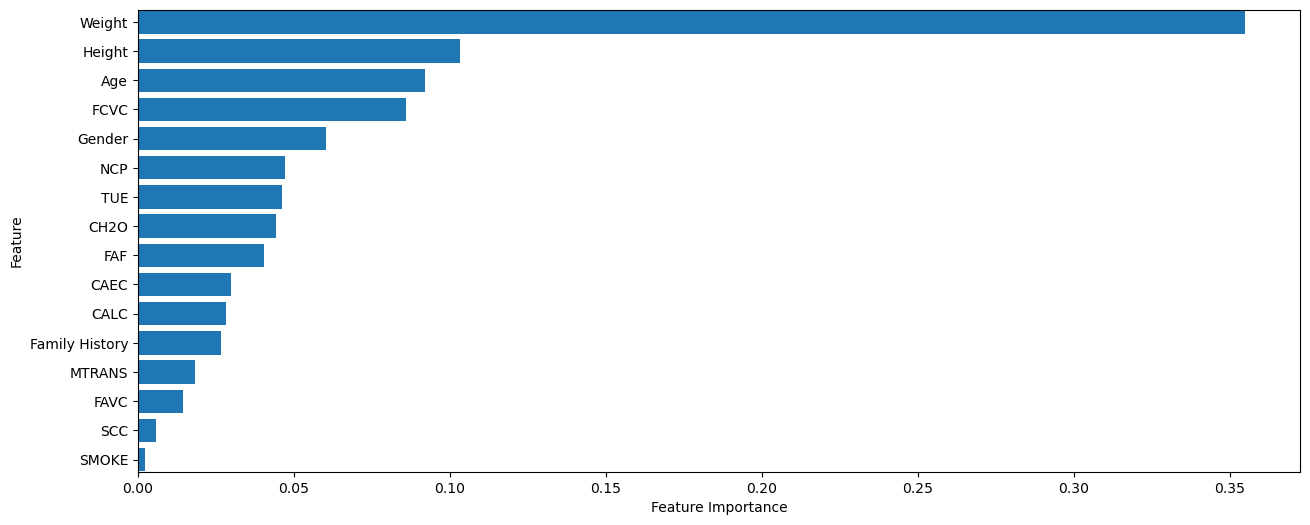

In [253]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(15,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)
ax.set_ylabel('Feature')
ax.set_xlabel('Feature Importance')

plt.show()


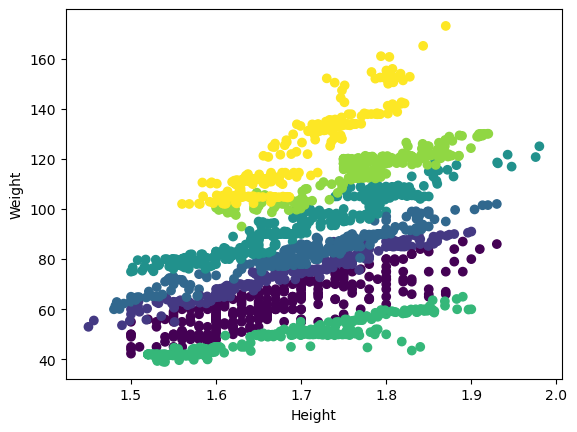

In [254]:
#scatterplot age and weight
plt.scatter(df.iloc[:,2],df.iloc[:,3],c =pd.factorize(df["Weight Classification"])[0])
#plt.scatter(df.iloc[:,2],df.iloc[:,3],c =pd.factorize(df["Gender"])[0])

plt.xlabel('Height')
plt.ylabel('Weight')
#plt.legend(pd.factorize(df["NObeyesdad"])[0])
plt.show()

In [255]:
# Train the Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9550827423167849


In [256]:
feature_importances = clf.feature_importances_
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:20]

[(0.3548879023541114, 'Weight'),
 (0.10334155896744777, 'Height'),
 (0.0919346003001891, 'Age'),
 (0.08585174501750413, 'FCVC'),
 (0.060160014297157095, 'Gender'),
 (0.047075070112541126, 'NCP'),
 (0.046330439647537906, 'TUE'),
 (0.044177611718065314, 'CH2O'),
 (0.040336974913539825, 'FAF'),
 (0.029991608993603612, 'CAEC'),
 (0.028319723395381816, 'CALC'),
 (0.026622842794939972, 'Family History'),
 (0.018324583303331095, 'MTRANS'),
 (0.014434543962053858, 'FAVC'),
 (0.005838121560091939, 'SCC'),
 (0.002372658662503995, 'SMOKE')]

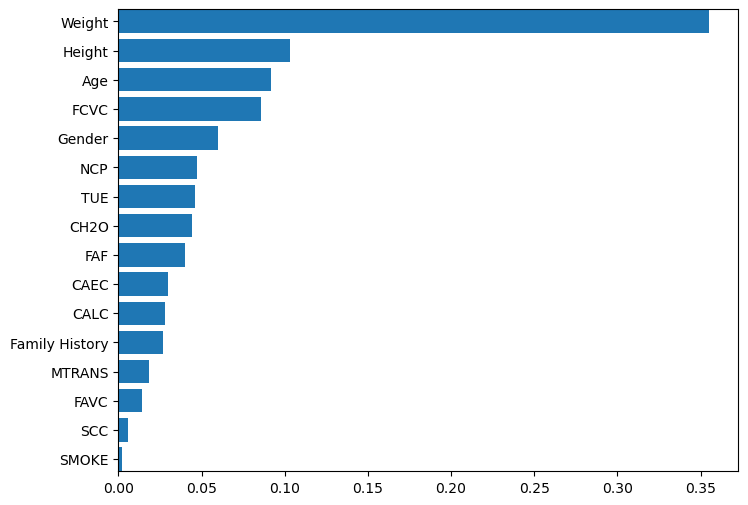

In [257]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [260]:
# Extract single tree
#estimator = rfc.estimators_[5]
#export_graphviz(estimator, out_file='tree.dot', 
                #feature_names = X,
                #class_names = y,
                #rounded = True, proportion = False, 
                #precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'tree.png')

ValueError: Length of feature_names, 2111 does not match number of features, 16

Extra Trees

In [261]:
# Train an Extra Trees Model
etc = ExtraTreesClassifier(random_state=42)
etc.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [70]:
# Evaluate the model
print("Test Accuracy:", etc.score(X_test, y_test))
print("Train Accuracy:", etc.score(X_train, y_train))

Test Accuracy: 0.9456264775413712
Train Accuracy: 1.0


Support Vector Machine

In [71]:
# Train a SVM
svm = SVC(random_state=42, kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [72]:
# Evaluate the model
print("Test Accuracy:", svm.score(X_test, y_test))
print("Train Accuracy:", svm.score(X_train, y_train))

Test Accuracy: 0.8888888888888888
Train Accuracy: 0.9022511848341233


In [80]:
svm

SVC(kernel='linear', random_state=0)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X.iloc[:, 1:3])
X.iloc[:, 1:3] = imputer.transform(X.iloc[:, 1:3])

In [74]:
# Create a mesh to plot decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


In [79]:
# Plot decision boundaries for each gamma value
plt.figure(figsize=(20, 10))
for i, gamma in enumerate(gamma_values, 1):
    # Train SVM with RBF kernel
    clf_rbf = SVC(kernel='rbf', gamma=gamma)
    clf_rbf.fit(X, y)

    # Create a mesh to plot decision boundaries
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot decision boundary
    plt.subplot(2, 3, i)
    Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_rbf = Z_rbf.reshape(xx.shape)
    plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(f'RBF SVM (Gamma={gamma})')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

NameError: name 'gamma_values' is not defined

<Figure size 2000x1000 with 0 Axes>

HyperPrameter Tuning of Random Forest Classifier

In [42]:
# Hyperparameter tuning Random Forest
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a base model
#rfc = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_rfc = grid_search.best_estimator_

# Evaluate the best model
print("Test Accuracy:", best_rfc.score(X_test, y_test))
print("Train Accuracy:", best_rfc.score(X_train, y_train))

# Print the classification report
y_pred = best_rfc.predict(X_test)
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.9527186761229315
Train Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.89      0.90      0.90        62
           2       0.86      0.88      0.87        56
           3       0.98      0.96      0.97        50
           4       0.99      0.96      0.97        78
           5       0.97      0.98      0.97        58
           6       1.00      1.00      1.00        63

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423

Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 1 56  5  0  0  0  0]
 [ 0  6 49  1  0  0  0]
 [ 0  0  2 48  0  0  0]
 [ 0  0  1  0 75  2  0]
 [ 0  0  0 

In [41]:
# Define the parameter distributions
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
# Create a base model
#rfc = RandomForestClassifier(random_state=42)

# Instantiate the randomized search model
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=0, n_jobs=-1)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Get the best model
best_rfc = random_search.best_estimator_

# Evaluate the best model
print("\nBest Model Performance:")
print("Test Accuracy:", best_rfc.score(X_test, y_test))

# Make predictions
y_pred = best_rfc.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best cross-validation score:  0.9543869506435131

Best Model Performance:
Test Accuracy: 0.9527186761229315

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.88      0.92      0.90        62
           2       0.88      0.88      0.88        56
           3       0.96      0.96      0.96        50
           4       0.99      0.96      0.97        78
           5       0.97      0.98      0.97        58
           6       1.00      1.00      1.00        63

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423


Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 0 57  5  0  0  0  0]
 [ 0